# QC picks

In [1]:
import pandas as pd

In [2]:
picks = pd.read_csv('picks_Vemund.csv')

In [3]:
picks.head()

x    y   xline
0  84.947599  1.0  4000.0
1  84.942648  2.0  4000.0
2  84.937697  3.0  4000.0
3  84.932745  4.0  4000.0
4  84.927794  5.0  4000.0

In [4]:
import matplotlib.pyplot as plt

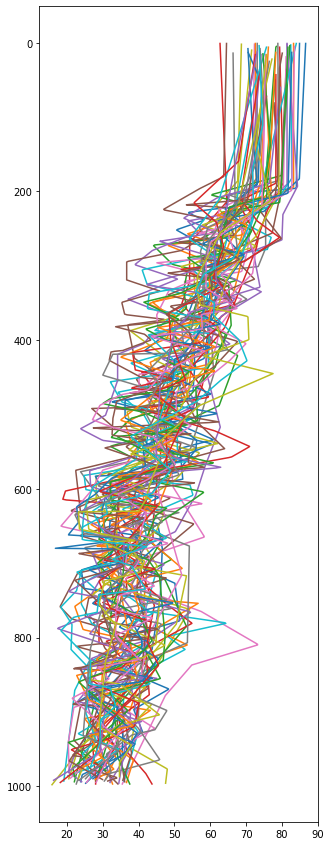

In [12]:
plt.figure(figsize=(5,15))
for line in picks.xline.unique():
    plt.plot(picks.loc[picks['xline']==line]['x'], picks.loc[picks['xline']==line]['y'])
plt.gca().invert_yaxis()

In [6]:
pivoted_picks = picks.pivot_table(index='y', values='x', columns='xline').fillna(method='ffill').fillna(method='bfill')

In [7]:
import numpy as np
import seaborn as sns

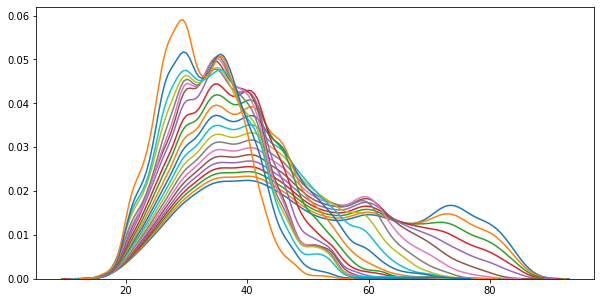

In [8]:
plt.figure(figsize=(10,5))
for i in range(int(900/40)):
    sns.distplot(np.array(pivoted_picks.iloc[40*i:40*(i+40)]).reshape(-1,1), rug=False, hist=False)

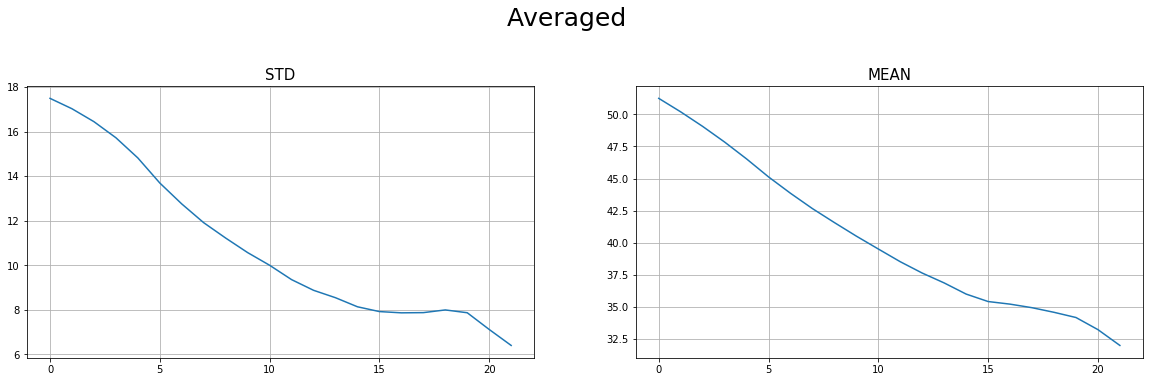

In [9]:
fig, ax = plt.subplots(1,2,figsize=(20,5))
vals = []; mean = []
for i in range(int(900/40)):
    vals.append(np.array(pivoted_picks.iloc[40*i:40*(i+40)]).reshape(-1,1).var()**(0.5))
    mean.append(np.array(pivoted_picks.iloc[40*i:40*(i+40)]).reshape(-1,1).mean())
ax[0].plot(range(int(900/40)), vals); ax[0].grid(); ax[0].set_title('STD', fontsize=15)
ax[1].plot(range(int(900/40)), mean); ax[1].grid(); ax[1].set_title('MEAN', fontsize=15)
plt.suptitle('Averaged', fontsize=25, y=1.1)
plt.show()

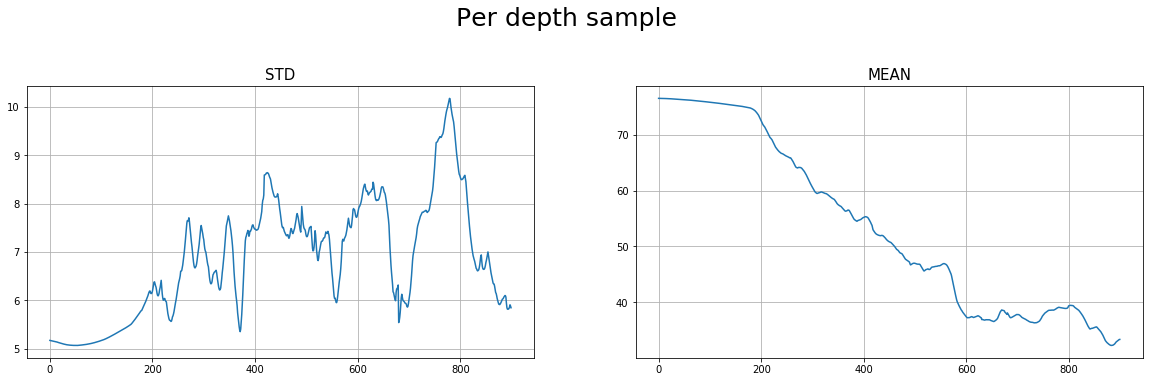

In [10]:
fig, ax = plt.subplots(1,2,figsize=(20,5))
vals = []; mean = []
for i in range(900):
    vals.append(np.array(pivoted_picks.iloc[i]).reshape(-1,1).var()**(0.5))
    mean.append(np.array(pivoted_picks.iloc[i]).reshape(-1,1).mean())
ax[0].plot(range((900)), vals); ax[0].grid(); ax[0].set_title('STD', fontsize=15)
ax[1].plot(range((900)), mean); ax[1].grid(); ax[1].set_title('MEAN', fontsize=15)
plt.suptitle('Per depth sample', fontsize=25, y=1.1)
plt.show()

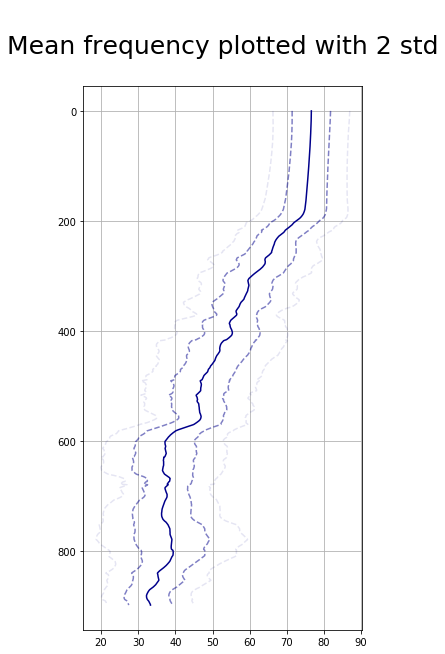

In [11]:
plt.figure(figsize=(5,10))
std = []; mean = []
for i in range(900):
    std.append(np.array(pivoted_picks.iloc[i]).reshape(-1,1).var()**(0.5))
    mean.append(np.array(pivoted_picks.iloc[i]).reshape(-1,1).mean())

plt.plot(np.array(mean) - 2*np.array(std), range((900)), linestyle='--', c='darkblue', alpha=0.1)
plt.plot(np.array(mean) + 2*np.array(std), range((900)), linestyle='--', c='darkblue', alpha=0.1)
plt.plot(np.array(mean) - np.array(std), range((900)), linestyle='--', c='darkblue', alpha=0.5)
plt.plot(np.array(mean) + np.array(std), range((900)), linestyle='--', c='darkblue', alpha=0.5)
plt.plot(mean, range((900)), c='darkblue')
plt.gca().invert_yaxis()
plt.title('\nMean frequency plotted with 2 std', fontsize=25, y=1.05)
plt.grid()
plt.show()